<a href="https://colab.research.google.com/github/hsp32145/Rain-prediction-using-Logistic-Regression/blob/main/Copy_of_IPL_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import io

In [1]:
from google.colab import files
uploaded = files.upload()

Saving IPL_Matches_2022.csv to IPL_Matches_2022.csv


In [7]:
data = pd.read_csv(io.BytesIO(uploaded['IPL_Matches_2022.csv']))
data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [8]:
data.shape

(74, 20)

In [9]:
data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

**Data Pre processing** - **Finding Out NaN values**

In [10]:
data.isna().any()

ID                 False
City               False
Date               False
Season             False
MatchNumber        False
Team1              False
Team2              False
Venue              False
TossWinner         False
TossDecision       False
SuperOver          False
WinningTeam        False
WonBy              False
Margin             False
method              True
Player_of_Match    False
Team1Players       False
Team2Players       False
Umpire1            False
Umpire2            False
dtype: bool

In [11]:
data.describe()

,ID,Season,Margin,method
count,7.400000e+01,74.0,74.000000,0.0
mean,1.304520e+06,2022.0,16.972973,NaN
std,1.848086e+03,0.0,19.651047,NaN
min,1.304047e+06,2022.0,2.000000,NaN
25%,1.304065e+06,2022.0,5.250000,NaN
50%,1.304084e+06,2022.0,8.000000,NaN
75%,1.304102e+06,2022.0,18.000000,NaN
max,1.312200e+06,2022.0,91.000000,NaN


In [12]:
#Missing value calculation
data.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [13]:
(data.isnull().sum()/(len(data)))*100

ID                   0.0
City                 0.0
Date                 0.0
Season               0.0
MatchNumber          0.0
Team1                0.0
Team2                0.0
Venue                0.0
TossWinner           0.0
TossDecision         0.0
SuperOver            0.0
WinningTeam          0.0
WonBy                0.0
Margin               0.0
method             100.0
Player_of_Match      0.0
Team1Players         0.0
Team2Players         0.0
Umpire1              0.0
Umpire2              0.0
dtype: float64

# **Exploratory Data Analysis**

In [14]:
data.describe()

,ID,Season,Margin,method
count,7.400000e+01,74.0,74.000000,0.0
mean,1.304520e+06,2022.0,16.972973,NaN
std,1.848086e+03,0.0,19.651047,NaN
min,1.304047e+06,2022.0,2.000000,NaN
25%,1.304065e+06,2022.0,5.250000,NaN
50%,1.304084e+06,2022.0,8.000000,NaN
75%,1.304102e+06,2022.0,18.000000,NaN
max,1.312200e+06,2022.0,91.000000,NaN


In [15]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,74.0,NaN,NaN,NaN,1304520.256757,1848.085956,1304047.0,1304065.25,1304083.5,1304101.75,1312200.0
City,74,5,Mumbai,48,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,74,62,2022-04-10,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Season,74.0,NaN,NaN,NaN,2022.0,0.0,2022.0,2022.0,2022.0,2022.0,2022.0
MatchNumber,74,74,Final,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team1,74,10,Rajasthan Royals,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Team2,74,10,Sunrisers Hyderabad,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Venue,74,6,"Wankhede Stadium, Mumbai",21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TossWinner,74,10,Gujarat Titans,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TossDecision,74,2,field,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
data['ID'].count() #No. of matches played according to dataset

74

In [17]:
data['Season'].unique() #No of IPL seasons

array([2022])

## Which IPl team won by taking minimum wickets?

In [18]:
data.iloc[data['ID'].idxmax()]


ID                                                           1312200
City                                                       Ahmedabad
Date                                                      2022-05-29
Season                                                          2022
MatchNumber                                                    Final
Team1                                               Rajasthan Royals
Team2                                                 Gujarat Titans
Venue                               Narendra Modi Stadium, Ahmedabad
TossWinner                                          Rajasthan Royals
TossDecision                                                     bat
SuperOver                                                          N
WinningTeam                                           Gujarat Titans
WonBy                                                        Wickets
Margin                                                             7
method                            

In [19]:
data.iloc[data['ID'].idxmin()]

ID                                                           1304047
City                                                          Mumbai
Date                                                      2022-03-26
Season                                                          2022
MatchNumber                                                        1
Team1                                            Chennai Super Kings
Team2                                          Kolkata Knight Riders
Venue                                       Wankhede Stadium, Mumbai
TossWinner                                     Kolkata Knight Riders
TossDecision                                                   field
SuperOver                                                          N
WinningTeam                                    Kolkata Knight Riders
WonBy                                                        Wickets
Margin                                                             6
method                            

**Probability of winning a game if toss was won**

In [22]:
probability_of_win = data['TossWinner'] == data['WinningTeam']

probability_of_win.groupby(probability_of_win).size()

False    38
True     36
dtype: int64

<Axes: ylabel='count'>

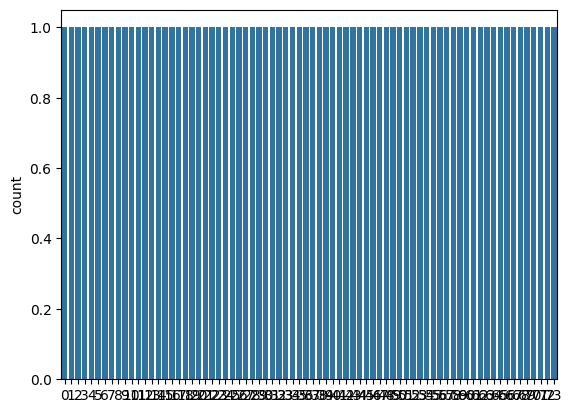

In [23]:
sns.countplot(probability_of_win)

## Highest wins by teams per season


In [24]:
data.groupby('Season')['WinningTeam'].value_counts()

Season  WinningTeam                
2022    Gujarat Titans                 12
        Rajasthan Royals               10
        Lucknow Super Giants            9
        Royal Challengers Bangalore     9
        Delhi Capitals                  7
        Punjab Kings                    7
        Kolkata Knight Riders           6
        Sunrisers Hyderabad             6
        Chennai Super Kings             4
        Mumbai Indians                  4
Name: count, dtype: int64

In [25]:
data['TossDecision'].value_counts()

TossDecision
field    59
bat      15
Name: count, dtype: int64

In [26]:
#Man of match-Highest to lowest
data['Player_of_Match'].value_counts()

Player_of_Match
Kuldeep Yadav       4
JC Buttler          3
HH Pandya           2
KL Rahul            2
YS Chahal           2
KD Karthik          2
Avesh Khan          2
PWH de Silva        2
Shubman Gill        2
Umran Malik         2
JJ Bumrah           2
DA Miller           2
RA Tripathi         2
Q de Kock           2
UT Yadav            2
F du Plessis        1
R Parag             1
S Dhawan            1
Mohammed Shami      1
M Jansen            1
Rashid Khan         1
Mukesh Choudhary    1
LH Ferguson         1
SV Samson           1
LS Livingstone      1
E Lewis             1
MA Agarwal          1
KS Williamson       1
Anuj Rawat          1
Abhishek Sharma     1
PJ Cummins          1
S Dube              1
Mohsin Khan         1
KH Pandya           1
DR Sams             1
RM Patidar          1
Harpreet Brar       1
R Ashwin            1
V Kohli             1
SN Thakur           1
TA Boult            1
WP Saha             1
AD Russell          1
JM Bairstow         1
MR Marsh        

In [27]:
#in which city max no of ipl matches were played?
data['City'].value_counts()

City
Mumbai         48
Pune           13
Navi Mumbai     9
Ahmedabad       2
Kolkata         2
Name: count, dtype: int64

In [28]:
data['TossWinner'].value_counts()

TossWinner
Gujarat Titans                 10
Sunrisers Hyderabad            10
Mumbai Indians                  9
Kolkata Knight Riders           8
Royal Challengers Bangalore     8
Delhi Capitals                  8
Lucknow Super Giants            7
Chennai Super Kings             6
Rajasthan Royals                4
Punjab Kings                    4
Name: count, dtype: int64

**Separation of Numerical and categorical variables**

In [31]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['City', 'Date', 'MatchNumber', 'Team1', 'Team2', 'Venue', 'TossWinner',
       'TossDecision', 'SuperOver', 'WinningTeam', 'WonBy', 'Player_of_Match',
       'Team1Players', 'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')
Numerical Variables:
['ID', 'Season', 'Margin', 'method']


ID
Skew : 4.03


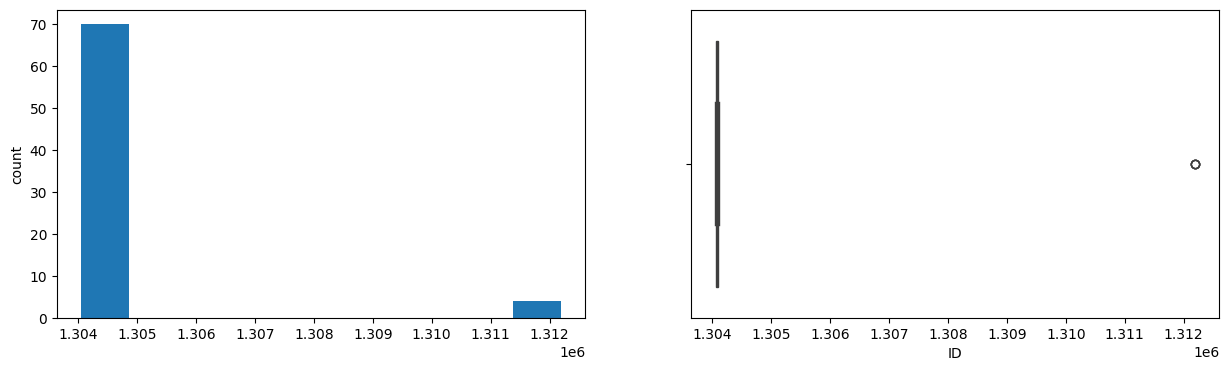

Season
Skew : 0


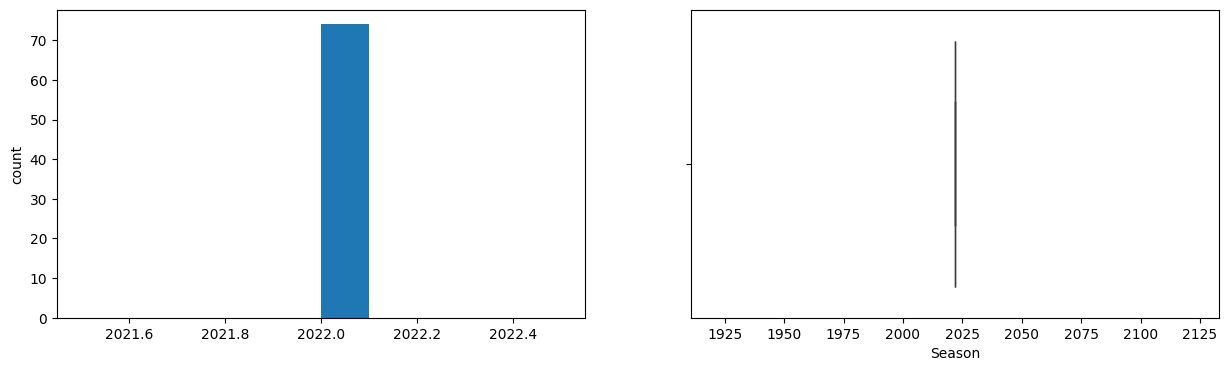

Margin
Skew : 1.98


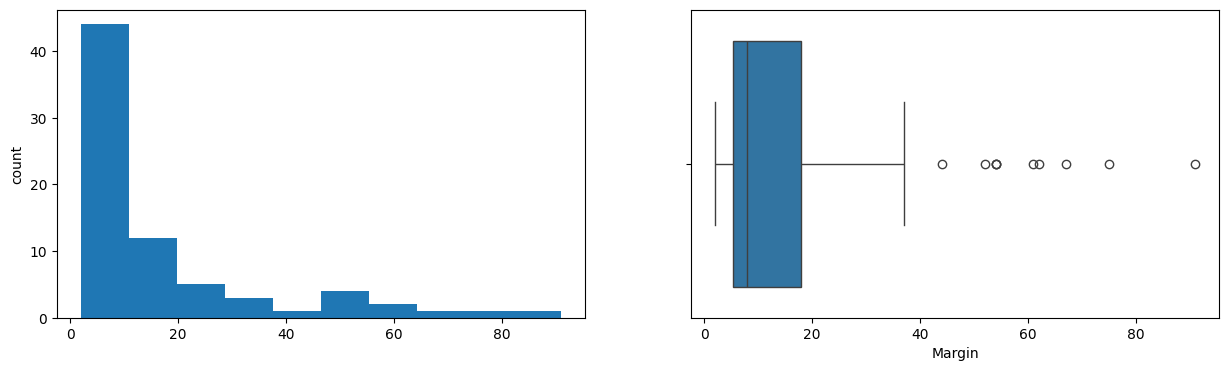

method
Skew : nan


ValueError: List of boxplot statistics and `positions` values must have same the length

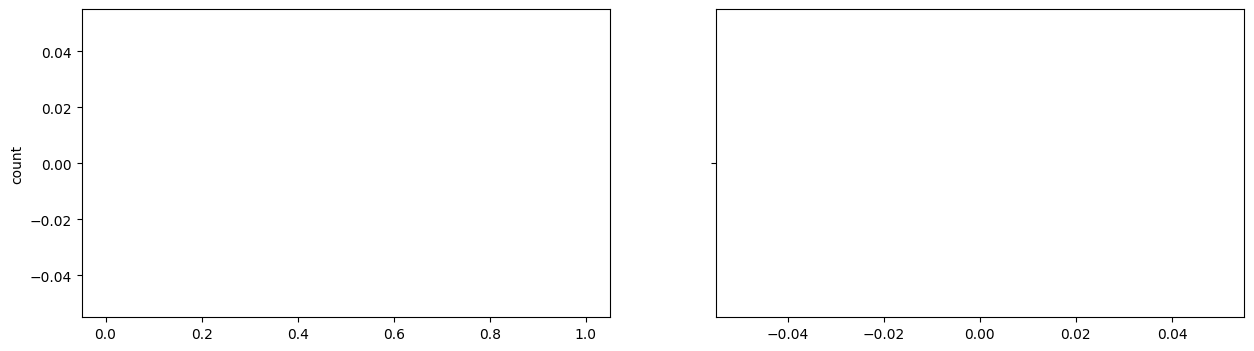

In [32]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

ID
Skew : 4.03


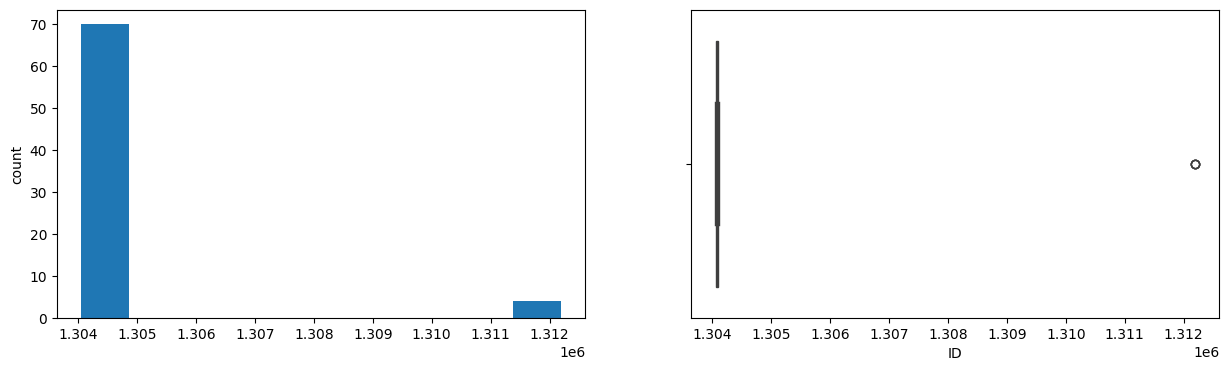

Season
Skew : 0


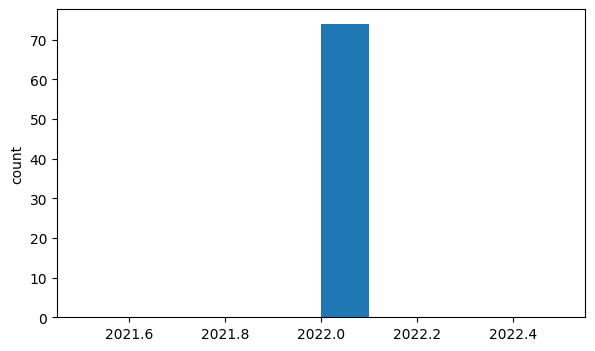

Margin
Skew : 1.98


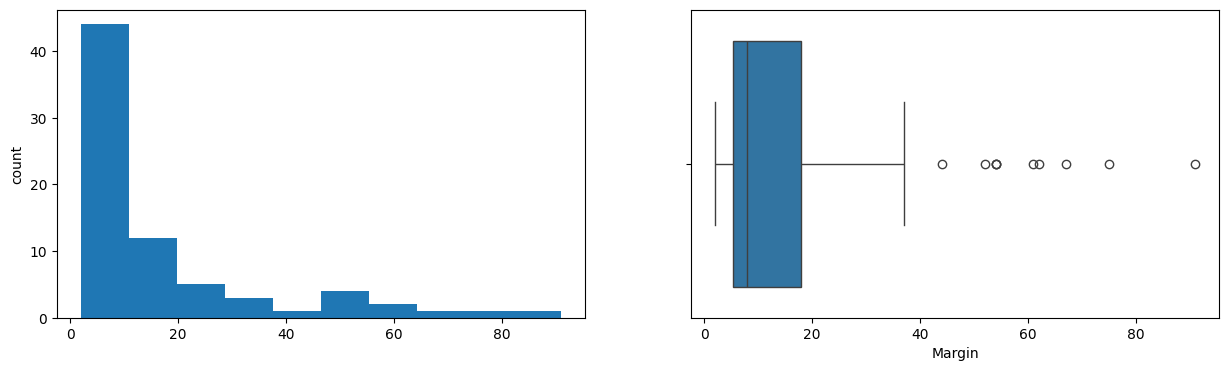

method
Skew : nan


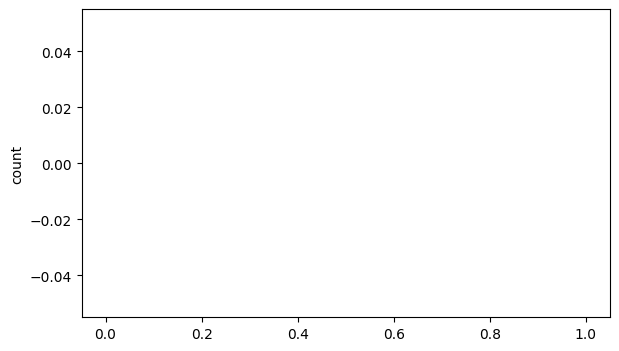

In [33]:
for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')

    # Check if the column has enough unique values for a meaningful boxplot
    if data[col].nunique() > 1:  # Only plot boxplot if more than one unique value
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col])

    plt.show()